# Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('911.csv')
#reading the csv file with pandas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)
#most popular top 5 zip value

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)
#most popular top 5 twp

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()
# total number of unique name of title

110

In [9]:
df['Reason']= df['title'].apply(lambda x: x.split(':')[0])
# creating new columns reason with the value EMS,Traffic i.e in columns 'title'

In [10]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [11]:
df['Reason'].value_counts().head(5)
# top most popular reason name

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot: xlabel='Reason', ylabel='count'>

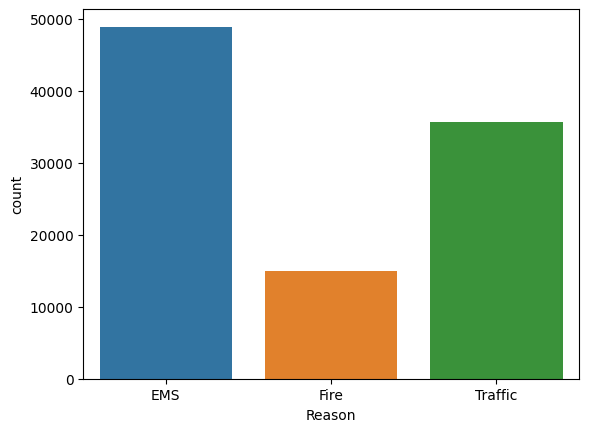

In [12]:
sns.countplot(data = df,x=df['Reason'])
# count plot of column reason

In [13]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99492 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype 
--------------  ----- 
99492 non-null  object
dtypes: object(1)
memory usage: 777.4+ KB


In [14]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [15]:
type(df['timeStamp'].iloc[0])
# the dtype of timestamp is string

str

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
# convertion the timestamp into datetime format

In [17]:
time = df['timeStamp'].iloc[0]
time
# time of index 0 of column timeStamp

Timestamp('2015-12-10 17:40:00')

In [18]:
time.hour
# hour of time

17

In [19]:
time.minute
# minute of time

40

In [20]:
time.second
# second of time

0

In [21]:
time.day
# day of time

10

In [22]:
time.month
# month of time

12

In [24]:
time.year
#year of time

2015

In [25]:
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)
# creating the hour column with the hour value of timeStamp column

In [26]:
df['hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

In [27]:
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Month']
# creating column month with the value month in TimeStamp column

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [28]:
df['day_of_Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['day_of_Week'].unique()
# creating the day_of_Week column with value dayofweek in timestamp column

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [29]:
dmap = {0:'Mon',1:'Tue',2:'wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
dmap.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [31]:
df['day_of_Week'] = df['day_of_Week'].map(dmap)
# mapping the day of week column with dmap dictionay 

In [32]:
df['day_of_Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    wed
99488    wed
99489    wed
99490    wed
99491    wed
Name: day_of_Week, Length: 99492, dtype: object

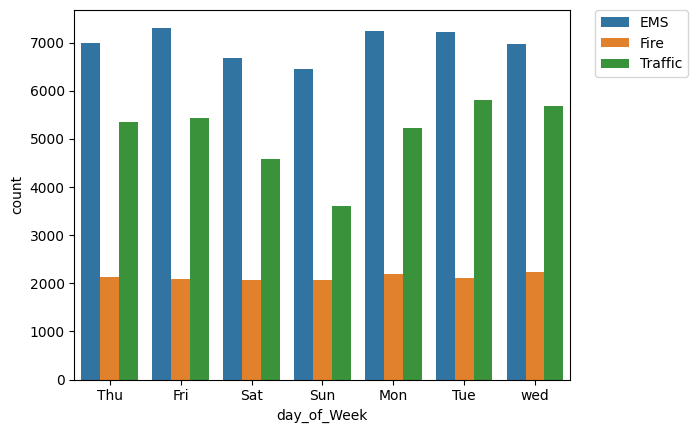

In [33]:
sns.countplot(data = df,x=df['day_of_Week'],hue=df['Reason'])
#countplot of day_of_week and reason
#to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [34]:
byMonth = df.groupby(df['Month']).count()
byMonth.head()
#grouping the dataframe with month column 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot: xlabel='Month'>

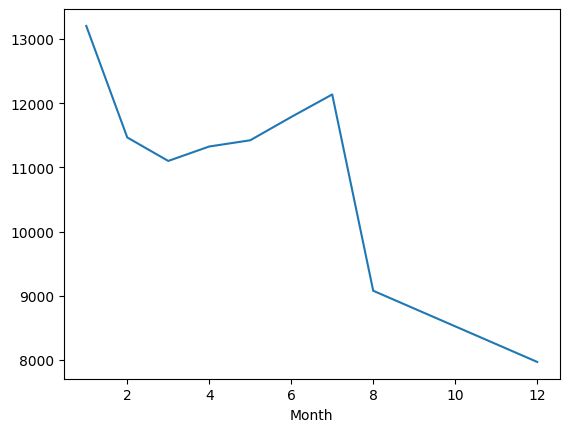

In [35]:
#simple sns plot
byMonth['lat'].plot()

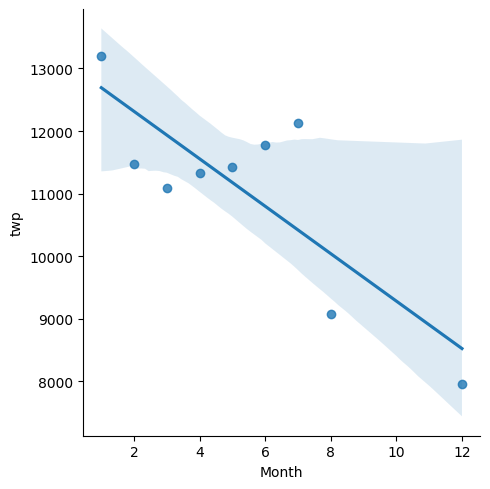

In [36]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [37]:
df['Date']= df['timeStamp'].apply(lambda x: x.date())

In [38]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,day_of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


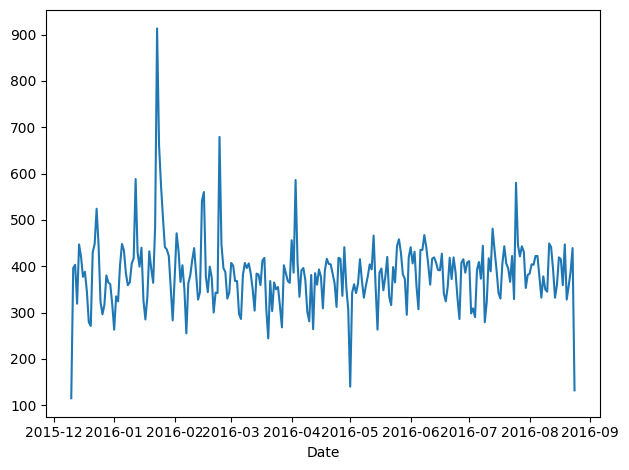

In [39]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

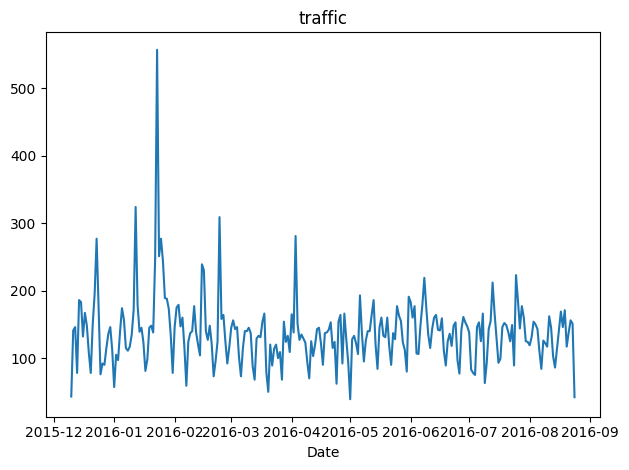

In [40]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('traffic')
plt.tight_layout()

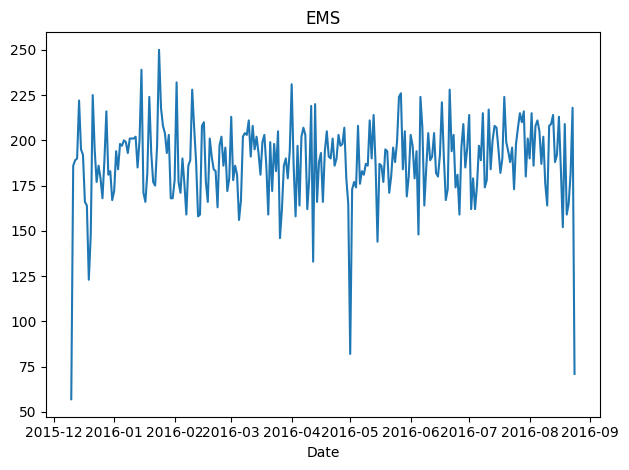

In [41]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

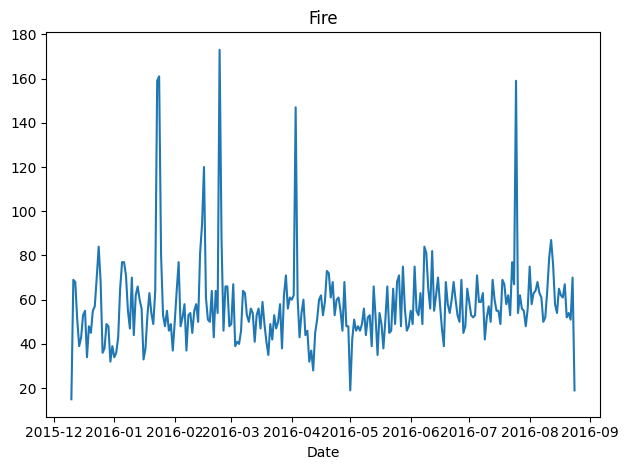

In [42]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [43]:
df.groupby(by=['day_of_Week','hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
day_of_Week hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
day_of_Week hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [44]:
df.groupby(by=['day_of_Week','hour']).count()['Reason']

day_of_Week  hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [45]:
df.groupby(by=['day_of_Week','hour']).count()['Reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [46]:
dayHour =df.groupby(by=['day_of_Week','hour']).count()['Reason'].unstack()

<AxesSubplot: xlabel='hour', ylabel='day_of_Week'>

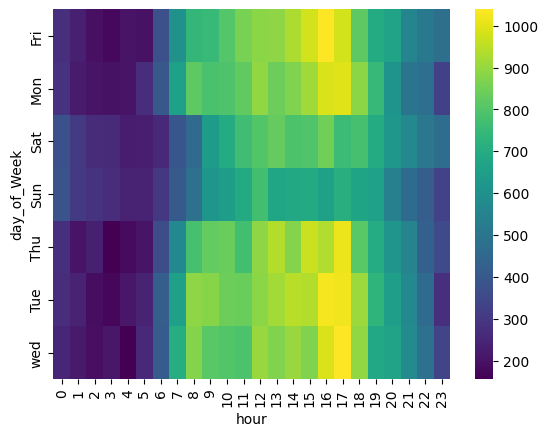

In [47]:
sns.heatmap(dayHour,cmap='viridis')

<AxesSubplot: xlabel='hour', ylabel='day_of_Week'>

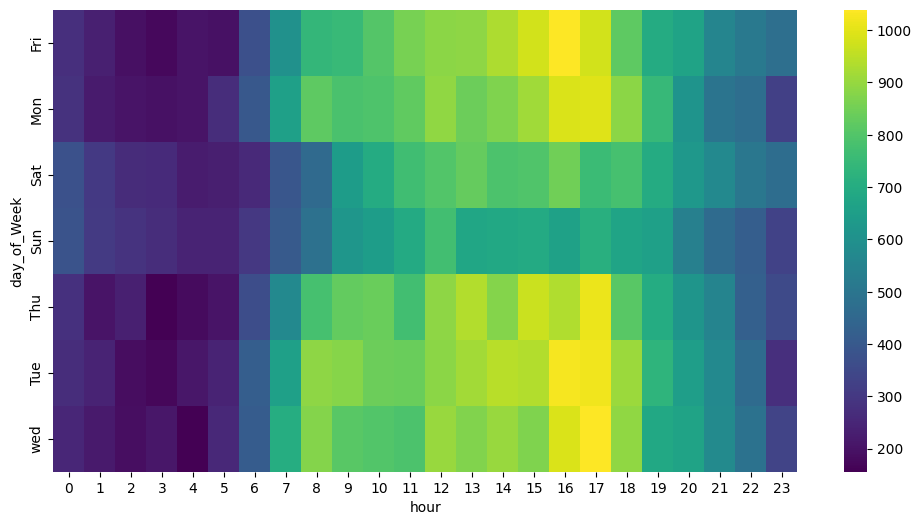

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [49]:
#sns.clustermap(dayHour)

In [50]:
df.groupby(by=['day_of_Week','Month']).count()['Reason'].unstack()

Month,1,2,3,4,5,6,7,8,12
day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [51]:
dMonth = df.groupby(by=['day_of_Week','hour']).count()['Reason'].unstack()

<AxesSubplot: xlabel='hour', ylabel='day_of_Week'>

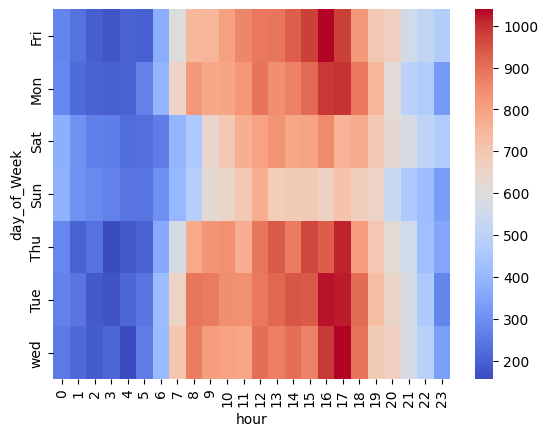

In [52]:
sns.heatmap(dMonth,cmap='coolwarm')

In [53]:
#sns.clustermap(dMonth,cmap='coolwarm')